# Scaling

여러 feature의 상대적 영향력을 비교하려면 feature의 값을 scaling 해야 함.\
(회귀분석에서 B->β 같은 느낌. 특성 간 상대적 영향력)

- StandardScaler: 평균과 표준편차 사용 = mean(Rx), mean(Ry) = 0 (최소, 최대는 정해지지 않음)
  - **정규분포를 따르는 경우** 적합합 (정규분포를 따른다 = 이상치가 (거의) 없다)
  - 이상치의 영향이 남아있음. (많이 쏠린 쪽이 영향을 더 크게 가짐)
  - 이상치 문제가 없다면 상관 X
- MinMaxScaler: 최소 최대 사용 = Rx, Ry -> [0, 1] $min(X) = 0, max(X) = 1$
  - 최소와 최대값이 흔히 **아는 값**일 때 (픽셀의 $[0, 255]$)
  - **이상치 영향력이 감소** (나머지 집합과 이상치 집합의 거리가 가까워짐)
  - 너무 일률적으로 줄여버림. 아무리 범위가 커도 그냥 [0, 1]...
- RobustScaler: 중앙값과 사분위수(quartile) 사용. BoxPlot처럼 이상치를 제거하기에 좋음.
  - $(value - median) / (p_{75} - p_{25})$
  - 이상치의 영향을 제거하면서 다른 값들과의 관계도 비교 가능
  - (range를 계산할 때는 outlier가 포함되지 않지만, 이상치 집단과 나머지 집단의 **거리는 보존됨**.)

In [23]:
from sklearn.datasets           import fetch_california_housing
from sklearn.datasets           import load_breast_cancer
from sklearn.datasets           import make_blobs
from sklearn.linear_model       import LinearRegression
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import MinMaxScaler
from sklearn.preprocessing      import StandardScaler
from sklearn.preprocessing      import RobustScaler
import matplotlib.pyplot        as plt
import mglearn

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [25]:
print(X_train[:3])
print(X_test[:3])

[[ 7.30030000e+00  1.90000000e+01  7.96160000e+00  1.13760000e+00
   1.92600000e+03  3.08160000e+00  3.84600000e+01 -1.22680000e+02]
 [ 5.95470000e+00  1.80000000e+01  6.54732510e+00  1.10288066e+00
   5.47000000e+02  2.25102881e+00  3.29500000e+01 -1.17240000e+02]
 [ 3.21250000e+00  1.90000000e+01  5.20754717e+00  1.21698113e+00
   3.14000000e+02  2.96226415e+00  3.46800000e+01 -1.18270000e+02]]
[[ 4.15180000e+00  2.20000000e+01  5.66307278e+00  1.07547170e+00
   1.55100000e+03  4.18059299e+00  3.25800000e+01 -1.17050000e+02]
 [ 5.77960000e+00  3.20000000e+01  6.10722611e+00  9.27738928e-01
   1.29600000e+03  3.02097902e+00  3.39200000e+01 -1.17970000e+02]
 [ 4.34870000e+00  2.90000000e+01  5.93071161e+00  1.02621723e+00
   1.55400000e+03  2.91011236e+00  3.86500000e+01 -1.21840000e+02]]


In [28]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 X_train_scaled.max(axis=0)))

transformed shape: (15480, 8)
per-feature minimum before scaling:
 [   0.4999        1.            0.84615385    0.33333333    3.
    0.75         32.54       -124.35      ]
per-feature maximum before scaling:
 [ 1.50001000e+01  5.20000000e+01  1.41909091e+02  3.40666667e+01
  3.56820000e+04  5.99714286e+02  4.19500000e+01 -1.14310000e+02]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1.]


데이터 수는 변하지 않음. 그러나 Min, Max가 동일하게 0과 1로 바뀜.

In [8]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


C:\Users\nsun5\AppData\Local\Temp\ipykernel_31996\1470856839.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
C:\Users\nsun5\AppData\Local\Temp\ipykernel_31996\1470856839.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
C:\Users\ns

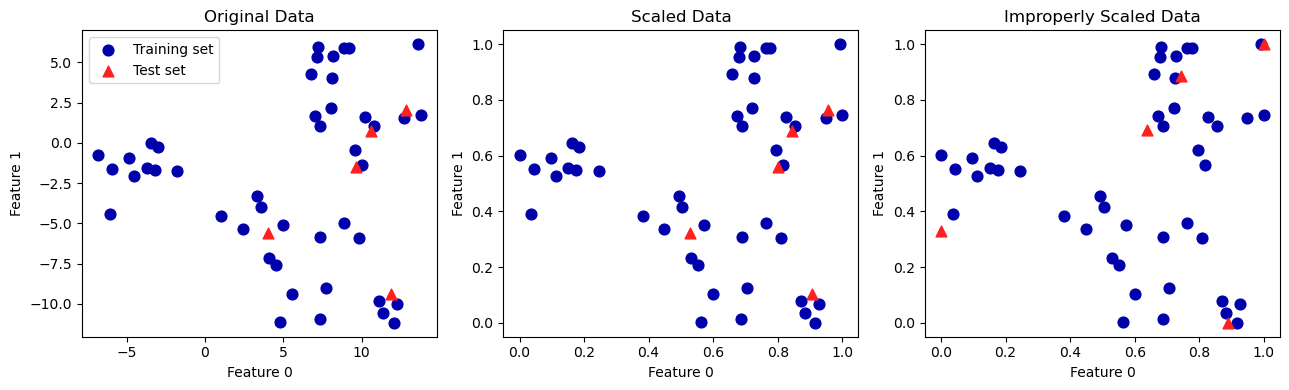

In [14]:
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
X_test_scaled_badly = test_scaler.fit_transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
fig.tight_layout()

train set을 scale한 걸로 test set을 scale해야지,\
무작정 test set을 새로운 scaler로 scale 하면 이게 다시 0부터 1까지 퍼져서 영 딴판이 된다.

In [12]:
housing = fetch_california_housing()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(housing['data'], housing['target'], random_state=0)

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.00000000e+00  0.00000000e+00  4.39236267e-03  4.94071146e-03
  1.40138457e-04 -9.63201130e-05  2.12539851e-03  4.98007968e-03]
per-feature maximum after scaling:
[1.         1.         0.39289609 0.29457323 0.45690742 2.0745533
 0.98831031 0.97310757]


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[-1.78124741 -2.19289928 -1.56564957 -1.20843416 -1.23922768 -0.35275272
 -1.43447085 -2.35974834]
per-feature maximum after scaling:
[  5.87221111   1.85490544  20.0648285   18.6092873   13.00032825
 186.53134437   2.9057227    2.48550381]


In [18]:
lr = LinearRegression().fit(X_train, y_train)
print("number of coefficients:", len(lr.coef_))
print("lr.coef_:") 
print(["{0:0.4f}".format(i) for i in lr.coef_])
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

number of coefficients: 8
lr.coef_:
['0.4391', '0.0096', '-0.1033', '0.6167', '-0.0000', '-0.0045', '-0.4174', '-0.4306']
lr.intercept_: -36.6095937787143
Training set score: 0.61
Test set score: 0.59


In [19]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("number of coefficients:", len(lr.coef_))
print("lr.coef_:") 
print(["{0:0.4f}".format(i) for i in lr.coef_])
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

number of coefficients: 8
lr.coef_:
['0.8319', '0.1209', '-0.2618', '0.3041', '-0.0087', '-0.0298', '-0.8924', '-0.8639']
lr.intercept_: 2.074372627906947
Training set score: 0.61
Test set score: 0.59


X만 scale함. y는 어차피 하나니 scale하지 않고 진행.

In [20]:
print(X_train[0])
print(X_train[3])

[ 7.3003e+00  1.9000e+01  7.9616e+00  1.1376e+00  1.9260e+03  3.0816e+00
  3.8460e+01 -1.2268e+02]
[   6.993        13.            6.42857143    1.          120.
    2.85714286   33.51       -117.18      ]


In [21]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))


per-feature minimum after scaling:
[-1.39896337 -1.47368421 -2.35395361 -5.81987181 -1.2342918  -2.48966456
 -0.44708995 -1.52894737]
per-feature maximum after scaling:
[5.25204688e+00 1.21052632e+00 3.18785507e+01 9.78268087e+01
 1.61214058e+01 1.45260610e+03 2.00793651e+00 1.02894737e+00]


In [22]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print("number of coefficients:", len(lr.coef_))
print("lr.coef_:") 
print(["{0:0.4f}".format(i) for i in lr.coef_])
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

number of coefficients: 8
lr.coef_:
['0.9573', '0.1824', '-0.1654', '0.0581', '-0.0072', '-0.0038', '-1.5776', '-1.6363']
lr.intercept_: 2.0410284706223414
Training set score: 0.61
Test set score: 0.59


scaler 종류를 바꾼다고 해서 모델의 결과가 바뀌진 않음 (점수는 동일)\
scaling의 의의는 베타값을 통해 특성 간 영향력 비교가 가능하다는 것.